In [7]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Portfolio Project - Movies
#### Exploring features with high correlation regarding film gross earnings.

Before starting the project, my assumption for highly-correlated features include budget (numeric features) and company (string object). The overall exploration process of the project can be separated into three sections:

- `Data Preprocessing`
- `Data Visualization and Exploration`
- `Reflection and Conclusion`

** The dataset is obtainted through Kaggle (https://www.kaggle.com/datasets/danielgrijalvas/movies)
<br>** The project is referring to the tutorial by Alex The Analyst (https://www.youtube.com/watch?v=iPYVYBtUTyE&list=PLUaB-1hjhk8H48Pj32z4GZgGWyylqv85f&index=4)

### Data Preprocessing

In [58]:
# read in the data
df = pd.read_csv(r'/Users/saeroo/Desktop/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [59]:
# check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [60]:
# data type check
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [61]:
# drop missing values - since we are looking at the correlation between gross and budget & company,
# dropping missing values in these three columns is the best way we can do
df = df.dropna(subset = ['budget', 'gross', 'company'])

In [62]:
# update column data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [63]:
# new problem: `released` year is different from `year` column
df['yearcorrect'] = df['released'].astype(str).str.split(pat=',', expand=True)[1].str[:5]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [64]:
pd.set_option('display.max_rows', 20)
df.sort_values(by='gross', inplace=True, ascending=False)

In [65]:
# dropping duplicates - further exploration needed 
# e.g. generalizing company name with different name during different time period
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


### Data Vizualization & Exploration

In [66]:
# Budget high correlation
# Company high correlation

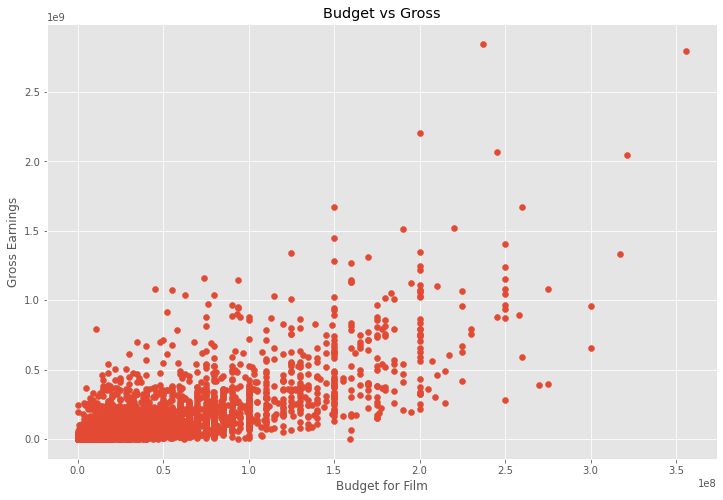

In [67]:
# visualization for more insights - pyplot
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

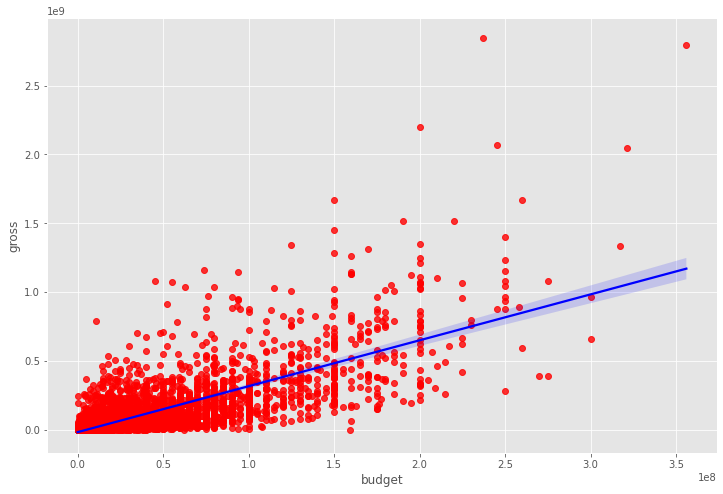

In [68]:
# visualization for more insights - seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [69]:
# CORRELATION - numeric
# pearson (used by default), kendall, spearman
# only works for numeric columns
correlation_matrix = df.corr() 
#df.corr(method='kendall')
#df.corr(method='spearman')
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.054837,0.205524,0.327531,0.274101,0.074106
score,0.054837,1.000000,0.473738,0.071609,0.222034,0.414502
votes,0.205524,0.473738,1.000000,0.439925,0.614858,0.352408
budget,0.327531,0.071609,0.439925,1.000000,0.740364,0.318572
gross,0.274101,0.222034,0.614858,0.740364,1.000000,0.275562
runtime,0.074106,0.414502,0.352408,0.318572,0.275562,1.000000


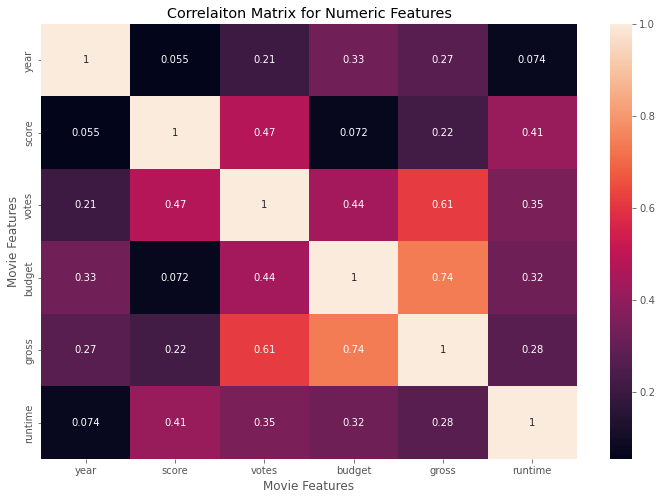

In [70]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlaiton Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

It've been shown that budget does correlated with gross based on its higher correlation of 0.74, which is the highest among all numeric features. But this correlation matrix doesn't include non-numeric features in the dataframe. Let's first categorize `object` column then generate another correlation matrix!

In [71]:
# CORRELATION - categorical

In [72]:
# categorize columns with object value
df_numerized = df.copy()

for col in df_numerized.columns:
    if(df_numerized[col].dtypes=='object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,387,5,0,2009,528,7.8,1100000.0,787,1264,1538,47,237000000,2847246203,1388,162.0,29
7445,389,5,0,2019,138,8.4,903000.0,106,514,1474,47,356000000,2797501328,987,181.0,39
3045,4921,5,6,1997,535,7.8,1100000.0,787,1264,1076,47,200000000,2201647264,1388,194.0,17
6663,3655,5,0,2015,530,7.8,876000.0,770,1809,357,47,245000000,2069521700,949,138.0,35
7244,390,5,0,2018,146,8.4,897000.0,106,514,1474,47,321000000,2048359754,987,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2980,5,0,1993,1471,4.5,1900.0,1808,3111,187,47,5000000,2970,1382,97.0,14
3681,1599,3,6,2000,1726,6.8,43000.0,954,1686,528,6,5000000,2554,468,108.0,21
272,2920,6,9,1982,1530,3.9,2300.0,263,55,1477,47,800000,2270,584,85.0,2
2417,2400,-1,6,1993,64,7.3,5100.0,23,1219,1687,26,11900000,596,492,134.0,13


In [73]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [76]:
correlation_matrix_numerized = df_numerized.corr() 
correlation_matrix_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.022979,0.009745,0.024553,-0.006272,0.014860,0.012937,0.013626,0.011365,-0.007201,-0.024571,0.023757,0.005985,0.021309,0.010700,0.026067
rating,-0.022979,1.000000,0.128334,0.022076,0.018921,0.059248,0.008995,0.015112,-0.007144,0.003259,0.020298,-0.187282,-0.169092,-0.083176,0.133146,0.020624
genre,0.009745,0.128334,1.000000,-0.072875,0.021997,0.034294,-0.136378,-0.009352,0.017818,0.002911,-0.010904,-0.368870,-0.244327,-0.073011,-0.060057,-0.070235
year,0.024553,0.022076,-0.072875,1.000000,-0.001265,0.054837,0.205524,-0.036608,-0.024763,-0.033350,-0.066507,0.327531,0.274101,-0.014205,0.074106,0.996639
released,-0.006272,0.018921,0.021997,-0.001265,1.000000,0.046251,0.029082,0.003151,0.008000,0.015182,-0.017260,0.019996,0.008650,-0.002795,0.008424,-0.004567
score,0.014860,0.059248,0.034294,0.054837,0.046251,1.000000,0.473738,0.005687,0.012538,0.008717,-0.044600,0.071609,0.222034,0.020471,0.414502,0.061420
votes,0.012937,0.008995,-0.136378,0.205524,0.029082,0.473738,1.000000,-0.010076,-0.005515,-0.017405,0.042229,0.439925,0.614858,0.118987,0.352408,0.203730
director,0.013626,0.015112,-0.009352,-0.036608,0.003151,0.005687,-0.010076,1.000000,0.263047,0.036509,0.011034,-0.009188,-0.029264,-0.006849,0.018078,-0.034327
writer,0.011365,-0.007144,0.017818,-0.024763,0.008000,0.012538,-0.005515,0.263047,1.000000,0.018873,0.022221,-0.039552,-0.036122,-0.003072,-0.016893,-0.022708
star,-0.007201,0.003259,0.002911,-0.033350,0.015182,0.008717,-0.017405,0.036509,0.018873,1.000000,-0.009994,-0.021593,-0.000236,0.014213,0.012236,-0.031902


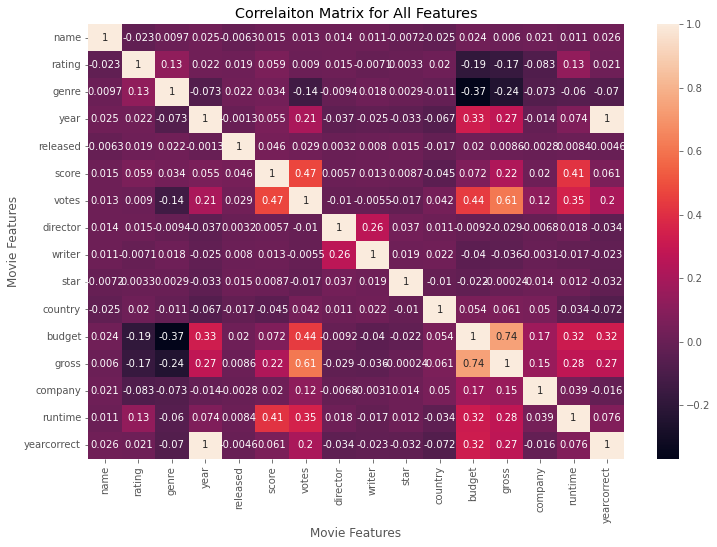

In [77]:
sns.heatmap(correlation_matrix_numerized, annot=True)
plt.title('Correlaiton Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

### Reflection
It seems like company doesn't play a significant role in determining gross earnings. However, we could keep exploring the features correlated with gross.

In [80]:
# pairing corr mat and see all features' correlation with respect to gross earnings
corr_pairs = correlation_matrix_numerized.unstack()
corr_pairs['gross'].sort_values()

genre         -0.244327
rating        -0.169092
writer        -0.036122
director      -0.029264
star          -0.000236
name           0.005985
released       0.008650
country        0.061002
company        0.149943
score          0.222034
yearcorrect    0.269215
year           0.274101
runtime        0.275562
votes          0.614858
budget         0.740364
gross          1.000000
dtype: float64

### Conclusion
`Votes` and `Budget` are the features with high correlation (>0.5) with `Gross`.